In [1]:
import numpy as np
import pandas as pd
import re

In [3]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
pd.set_option('display.max_colwidth',None)

In [5]:
df = pd.read_csv('gurgaon_properties_cleaned_v1.csv')
df.head(1)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet area: 650 sq.ft. (60.39 sq.m.),3,2,2,not available,2.0,NaN,0 to 1 Year Old,"['Sector 55-56 Metro Station', 'The Leaf Mall Sohna', 'Omaxe Gurgaon Mall', 'Badshahpur Sohna Rd Hwy', 'Vidya Niketan School', 'KIIT College of Engg', 'Scottish High International School', 'Rawal Institutions', 'Park Hospital', 'Indira Gandhi Intl Airport', 'Spaze Business Park', 'DLF Cyber City']",NaN,"['Lift(s)', 'Park']"


In [6]:
df.duplicated().sum()

122

In [7]:
# focus on -> areawithtype, additionalRoom, agePossession, FurnishDetails, Features
df.head(1)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet area: 650 sq.ft. (60.39 sq.m.),3,2,2,not available,2.0,NaN,0 to 1 Year Old,"['Sector 55-56 Metro Station', 'The Leaf Mall Sohna', 'Omaxe Gurgaon Mall', 'Badshahpur Sohna Rd Hwy', 'Vidya Niketan School', 'KIIT College of Engg', 'Scottish High International School', 'Rawal Institutions', 'Park Hospital', 'Indira Gandhi Intl Airport', 'Spaze Business Park', 'DLF Cyber City']",NaN,"['Lift(s)', 'Park']"


In [9]:
df[['price','area','areaWithType']].sample(5)

,price,area,areaWithType
1113,0.92,2287.0,Super Built up area 2287(212.47 sq.m.)Carpet area: 1600 sq.ft. (148.64 sq.m.)
206,1.42,1650.0,Super Built up area 1650(153.29 sq.m.)Carpet area: 1022.58 sq.ft. (95 sq.m.)
201,1.82,1942.0,Super Built up area 1942(180.42 sq.m.)
2614,1.20,2000.0,Super Built up area 2000(185.81 sq.m.)Built Up area: 1900 sq.ft. (176.52 sq.m.)Carpet area: 1850 sq.ft. (171.87 sq.m.)
397,6.00,2430.0,Plot area 270(225.75 sq.m.)


### 1. areaWithType

In [13]:
# This fuction extracts the Super Built up area
def get_super_built_up_area(text):
    match = re.search(r'Super Built up area (\d+\.?\d*)',text)
    if match:
        return float(match.group(1))
    return None

In [11]:
# This Function extracts the Built Up area or Carpet area
def get_area(text, area_type):
    match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)',text)
    if match:
        return float(match.group(1))
    return None

In [12]:
# This fuction checks if the area is provided in sq.m and converts it to sqft if needed
def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m. \)'.format(area_value),text)
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639 # conversion factor from sq.m. to sqft
    return area_value

In [18]:
# Extract Super Built up Area and convert to sqft if needed
df['super_built_up_area'] = df['areaWithType'].apply(get_super_built_up_area)
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']),axis=1)

# Extract Built Up area and convert to sqft if needed
df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']),axis=1)

# Extract Carpet area and convert to sqft if needed
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']),axis=1)

In [19]:
df[['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
662,3.50,house,3800.0,Built Up area: 3800 (353.03 sq.m.),NaN,3800.0,NaN
2146,2.45,flat,1531.0,Built Up area: 1200 (111.48 sq.m.)Carpet area: 1000 sq.ft. (92.9 sq.m.),NaN,1200.0,1000.0
819,1.10,flat,1990.0,Built Up area: 1990 (184.88 sq.m.),NaN,1990.0,NaN
179,4.80,flat,2500.0,Carpet area: 2500 (232.26 sq.m.),NaN,NaN,2500.0
2469,1.10,flat,1990.0,Built Up area: 1990 (184.88 sq.m.),NaN,1990.0,NaN


In [28]:
df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))].shape

(534, 20)

In [32]:
df[df['areaWithType'].str.contains('Plot')][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].head(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
9,1.2,house,1186.0,Plot area 1185.51(110.14 sq.m.),NaN,NaN,NaN
10,4.5,house,1350.0,Plot area 150(125.42 sq.m.),NaN,NaN,NaN
15,1.2,house,846.0,Plot area 846(78.6 sq.m.)Built Up area: 846 sq.ft. (78.6 sq.m.),NaN,846.0,NaN
19,5.5,house,1440.0,Plot area 160(133.78 sq.m.),NaN,NaN,NaN
25,9.0,house,3240.0,Plot area 360(301.01 sq.m.),NaN,NaN,NaN


In [33]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2616
carpet_area            1859
dtype: int64

In [44]:
all_nan_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]

In [47]:
all_nan_df.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
9,1.2,house,1186.0,Plot area 1185.51(110.14 sq.m.),NaN,NaN,NaN
10,4.5,house,1350.0,Plot area 150(125.42 sq.m.),NaN,NaN,NaN
19,5.5,house,1440.0,Plot area 160(133.78 sq.m.),NaN,NaN,NaN
25,9.0,house,3240.0,Plot area 360(301.01 sq.m.),NaN,NaN,NaN
26,7.0,house,2475.0,Plot area 275(229.94 sq.m.),NaN,NaN,NaN


In [49]:
all_nan_index = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].index

In [51]:
# Function to extract plot area from 'areaWithType' column
def extract_plot_area(area_with_type):
    match = re.search(r'Plot area (\d+\.?\d*)', area_with_type)
    return float(match.group(1)) if match else None

In [52]:
all_nan_df['built_up_area'] = all_nan_df['areaWithType'].apply(extract_plot_area)

In [56]:
all_nan_df.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
9,1.2,house,1186.0,Plot area 1185.51(110.14 sq.m.),NaN,1185.51,NaN
10,4.5,house,1350.0,Plot area 150(125.42 sq.m.),NaN,150.00,NaN
19,5.5,house,1440.0,Plot area 160(133.78 sq.m.),NaN,160.00,NaN
25,9.0,house,3240.0,Plot area 360(301.01 sq.m.),NaN,360.00,NaN
26,7.0,house,2475.0,Plot area 275(229.94 sq.m.),NaN,275.00,NaN


In [62]:
def convert_scale(row):
    if np.isnan(row['area']) or np.isnan(row['built_up_area']):
        return row['built_up_area']
    else:
        if round(row['area']/row['built_up_area']) == 9.0:
            return row['bulit_up_area'] * 9
        elif round(row['area']/row['built_up_area']) == 11.0:
            return row['built_up_area'] * 10.7
        else:
            return row['built_up_area']

In [65]:
all_nan_df['built_up_area'] = all_nan_df.apply(convert_scale,axis=1)

In [66]:
# update the original dataframe
df.update(all_nan_df)

In [67]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2070
carpet_area            1859
dtype: int64

In [68]:
df.head(2)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet area: 650 sq.ft. (60.39 sq.m.),3,2,2,not available,2.0,NaN,0 to 1 Year Old,"['Sector 55-56 Metro Station', 'The Leaf Mall Sohna', 'Omaxe Gurgaon Mall', 'Badshahpur Sohna Rd Hwy', 'Vidya Niketan School', 'KIIT College of Engg', 'Scottish High International School', 'Rawal Institutions', 'Park Hospital', 'Indira Gandhi Intl Airport', 'Spaze Business Park', 'DLF Cyber City']",NaN,"['Lift(s)', 'Park']",1081.0,NaN,650.0
1,flat,smart world gems,sector 89,0.95,8600.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,"study room,servant room",4.0,NaN,Within 6 months,"['Sant Soordas Sihi Metro Station', 'Airia Mall', 'Dwarka Expressway', 'Pataudi Road', 'NH-8', 'KMP Expressway', 'RPS International School', 'Genesis Hospital Sector 84', 'Gurgaon Railway Station', 'Vatika Business Park Sector 49', 'Holiday Inn Gurugram Sector 90', 'De Adventure Amusement Park', 'National Tennis Academy Sector 98', 'IMT Manesar']",NaN,"['Power Back-up', 'Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Park', 'Piped-gas', 'Internet/wi-fi connectivity', 'Fitness Centre / GYM', 'Club house / Community Center']",NaN,NaN,1103.0


# 2. additionalRoom

In [69]:
df['additionalRoom'].value_counts()

not available                                    1587
servant room                                      705
study room                                        250
others                                            225
pooja room                                        165
store room                                         99
study room,servant room                            99
pooja room,servant room                            82
pooja room,study room,servant room,store room      72
servant room,others                                60
pooja room,study room,servant room                 55
pooja room,study room,servant room,others          54
servant room,pooja room                            38
servant room,store room                            33
study room,others                                  29
pooja room,study room                              22
pooja room,others                                  17
pooja room,store room                              15
pooja room,store room,study 

In [70]:
# additinal Room
new_cols = ['study room','servant room','store room','pooja room','others']

for col in new_cols:
    df[col] = df['additionalRoom'].str.contains(col).astype(int)

In [76]:
df.sample(5)[['additionalRoom','study room','servant room','store room','pooja room','others']]

,additionalRoom,study room,servant room,store room,pooja room,others
1955,"study room,servant room",1,1,0,0,0
1770,"pooja room,study room,servant room",1,1,0,1,0
2338,not available,0,0,0,0,0
3542,not available,0,0,0,0,0
829,not available,0,0,0,0,0


## 3. agePossesion

In [77]:
df['agePossession'].value_counts()

1 to 5 Year Old       1676
5 to 10 Year Old       575
0 to 1 Year Old        530
undefined              332
10+ Year Old           310
Under Construction      90
Within 6 months         70
Within 3 months         26
Dec 2023                22
By 2023                 19
By 2024                 17
Dec 2024                16
Mar 2024                14
Oct 2024                 8
Jan 2024                 8
Aug 2023                 7
Dec 2025                 7
Jun 2024                 7
Nov 2023                 5
Aug 2024                 4
Sep 2023                 4
Jul 2024                 4
Oct 2023                 4
By 2025                  4
Nov 2024                 3
May 2024                 3
Feb 2024                 3
Jan 2025                 3
By 2027                  2
Sep 2025                 2
Dec 2026                 2
Jul 2025                 2
Jan 2026                 2
Jun 2027                 2
Jul 2027                 2
Mar 2025                 2
Oct 2025                 2
A

In [78]:
def categorization_age_possession(value):
    if pd.isna(value):
        return 'undefined'
    if '0 to 1 Year Old' in value or 'Within 6 months' in value or 'Within 3 months' in value:
        return 'New Property'
    if '1 to 5 Year Old' in value:
        return 'Relatively New'
    if '5 to 10 Year Old' in value:
        return 'Moderately Old'
    if '10+ Year Old' in value:
        return 'Old Property'
    if 'Under Construction' in value or 'By' in value:
        return 'Under Construction'
    try:
        # for entries like 'May 2024'
        int(value.split(' ')[-1])
        return 'Under Construction'
    except:
        return 'undefined'

In [80]:
df['agePossession'] = df['agePossession'].apply(categorization_age_possession)

In [82]:
df['agePossession'].value_counts()

Relatively New        1676
New Property           626
Moderately Old         575
undefined              333
Old Property           310
Under Construction     283
Name: agePossession, dtype: int64

In [87]:
df.head(1)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet area: 650 sq.ft. (60.39 sq.m.),3,2,2,not available,2.0,NaN,New Property,"['Sector 55-56 Metro Station', 'The Leaf Mall Sohna', 'Omaxe Gurgaon Mall', 'Badshahpur Sohna Rd Hwy', 'Vidya Niketan School', 'KIIT College of Engg', 'Scottish High International School', 'Rawal Institutions', 'Park Hospital', 'Indira Gandhi Intl Airport', 'Spaze Business Park', 'DLF Cyber City']",NaN,"['Lift(s)', 'Park']",1081.0,NaN,650.0,0,0,0,0,0


### 4. furnishDetail

In [91]:
df.sample(3)[['furnishDetails','features']]

,furnishDetails,features
2857,NaN,NaN
515,"['4 Fan', '1 Exhaust Fan', '1 Geyser', '5 Light', '1 Modular Kitchen', '1 Chimney', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Natural Light', 'Airy Rooms', 'Shopping Centre', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center']"
2417,"['3 Wardrobe', '5 Fan', '1 Exhaust Fan', '2 Geyser', '5 Light', '1 Curtains', 'No AC', 'No Bed', 'No Chimney', 'No Dining Table', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"


In [98]:
# Extract all unique furnishings from the furnishDetails column
all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

In [103]:
# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include)) # get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing] # remove empty strings
columns_to_include

['Chimney',
 'Geyser',
 'Water Purifier',
 'Stove',
 'TV',
 'Modular Kitchen',
 'Fridge',
 'Sofa',
 'AC',
 'Bed',
 'Light',
 'Exhaust Fan',
 'Curtains',
 'Dining Table',
 'Washing Machine',
 'Wardrobe',
 'Microwave',
 'Fan']

In [99]:
# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

In [104]:
# create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x,furnishing))

In [111]:
# create a new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]

In [112]:
furnishings_df.shape

(3803, 19)

In [118]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)

In [119]:
furnishings_df.sample(5)

,Chimney,Geyser,Water Purifier,Stove,TV,Modular Kitchen,Fridge,Sofa,AC,Bed,Light,Exhaust Fan,Curtains,Dining Table,Washing Machine,Wardrobe,Microwave,Fan
514,1,6,1,0,0,0,0,0,5,0,20,1,0,0,0,5,0,7
3562,0,0,0,0,0,1,0,0,3,0,4,0,0,0,0,0,0,4
1836,1,2,0,0,0,1,0,0,6,0,11,1,1,0,0,3,0,7
1488,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1338,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0


In [115]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [122]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

In [126]:
wcss_reduced = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

C:\Users\Aniket\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Aniket\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Aniket\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Aniket\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the valu

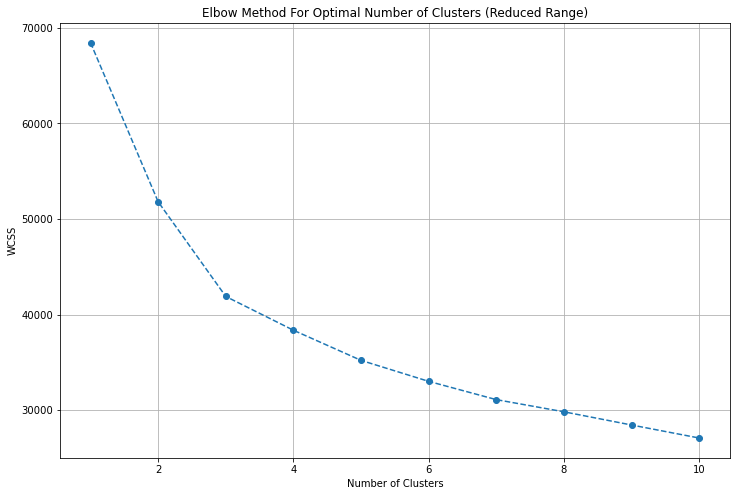

In [127]:
# plot the results
plt.figure(figsize=(12,8))
plt.plot(range(1,11),wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [128]:
n_cluster = 3

# Fit the Kmeans model
kmeans = KMeans(n_clusters=n_cluster, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignment for each row
cluster_assignments = kmeans.predict(scaled_data)

C:\Users\Aniket\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [129]:
df = df.iloc[:,:-18]

In [133]:
df['furnishing_type'] = cluster_assignments

In [143]:
df.sample(5)[['furnishDetails','furnishing_type']]
# 0 -> unfurished
# 1 -> semifurnished
# 2 -> furnished

,furnishDetails,furnishing_type
2873,"['5 Wardrobe', '5 Fan', '1 Exhaust Fan', '3 Geyser', '1 Stove', '11 Light', '1 Chimney', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine', 'No Water Purifier']",0
1121,NaN,2
2275,"['1 Water Purifier', '6 Fan', '1 Fridge', '1 Exhaust Fan', '4 Geyser', '1 Stove', '9 Light', '6 AC', '1 TV', '1 Modular Kitchen', '1 Chimney', '1 Curtains', '4 Bed', '4 Wardrobe', '1 Sofa', '1 Washing Machine', '1 Microwave', 'No Dining Table']",1
2239,NaN,2
22,"['1 Water Purifier', '5 Fan', '1 Exhaust Fan', '3 Geyser', '1 Stove', '12 Light', '4 AC', '1 Chimney', '1 Modular Kitchen', '1 TV', '2 Wardrobe', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Washing Machine']",0


### 5. features

In [144]:
df[['features']].sample(5)

,features
2152,"['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Internet/wi-fi connectivity', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']"
1598,"['Feng Shui / Vaastu Compliant', 'Water Storage', 'Park', 'Visitor Parking']"
761,NaN
1287,"['Water purifier', 'Centrally Air Conditioned', 'Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
2150,"['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'No open drainage around', 'Visitor Parking', 'Swimming Pool', 'Park', 'Natural Light', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']"


In [146]:
df['features'].isnull().sum()

635

In [147]:
import pandas as pd
app_df = pd.read_csv('appartments.csv')
app_df.head(2)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
0,Smartworld One DXP,"2, 3, 4 BHK Apartment in Sector 113, Gurgaon","['Bajghera Road', 'Palam Vihar Halt', 'DPSG Palam Vihar', 'Park Hospital', 'Gurgaon Railway Station']","{'Bajghera Road': '800 Meter', 'Palam Vihar Halt': '2.5 KM', 'DPSG Palam Vihar': '3.1 KM', 'Park Hospital': '3.1 KM', 'Gurgaon Railway Station': '4.9 KM', 'The NorthCap University': '5.4 KM', 'Dwarka Expy': '1.2 KM', 'Hyatt Place Gurgaon Udyog Vihar': '7.7 KM', 'Dwarka Sector 21, Metro Station': '7.2 KM', 'Pacific D21 Mall': '7.4 KM', 'Indira Gandhi International Airport': '14.7 KM', 'Hamoni Golf Camp': '6.2 KM', 'Fun N Food Waterpark': '8.8 KM', 'Accenture DDC5': '9 KM'}",https://www.99acres.com/smartworld-one-dxp-sector-113-gurgaon-npxid-r400415,"{'2 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,370 sq.ft.', 'price-range': '₹ 2 - 2.4 Cr'}, '3 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,850 - 2,050 sq.ft.', 'price-range': '₹ 2.25 - 3.59 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '2,600 sq.ft.', 'price-range': '₹ 3.24 - 4.56 Cr'}}","['Swimming Pool', 'Salon', 'Restaurant', 'Spa', 'Cafeteria', 'Sun Deck', '24x7 Security', 'Club House', 'Gated Community']"
1,M3M Crown,"3, 4 BHK Apartment in Sector 111, Gurgaon","['DPSG Palam Vihar Gurugram', 'The NorthCap University', 'Park Hospital, Palam Vihar', 'Pacific D21 Mall', 'Palam Vihar Halt Railway Station']","{'DPSG Palam Vihar Gurugram': '1.4 Km', 'The NorthCap University': '4.4 Km', 'Park Hospital, Palam Vihar': '1.4 Km', 'Pacific D21 Mall': '8.2 Km', 'Palam Vihar Halt Railway Station': '1.2 Km', 'Dwarka Sector 21 Metro Station': '8.1 Km', 'Dwarka Expressway': '450 m', 'Fun N Food Water Park': '8.1 Km', 'Indira Gandhi International Airport': '14.1 Km', 'Tau DeviLal Sports Complex': '11.2 Km', 'Hamoni Golf Camp': '5 Km', 'Hyatt Place': '6.1 Km', 'Altrade Business Centre': '11.2 Km'}",https://www.99acres.com/m3m-crown-sector-111-gurgaon-npxid-r404068,"{'3 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '1,605 - 2,170 sq.ft.', 'price-range': '₹ 2.2 - 3.03 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '2,248 - 2,670 sq.ft.', 'price-range': '₹ 3.08 - 3.73 Cr'}}","['Bowling Alley', 'Mini Theatre', 'Manicured Garden', 'Swimming Pool', 'Flower Garden', 'Reading Lounge', 'Golf Course', 'Barbecue', 'Sauna']"


In [156]:
app_df['PropertyName'] = app_df['PropertyName'].str.lower()

In [157]:
temp_df = df[df['features'].isnull()]

In [158]:
temp_df.shape

(635, 26)

In [159]:
x = temp_df.merge(app_df,left_on='society', right_on='PropertyName',how='left')['TopFacilities']

In [160]:
df.loc[temp_df.index,'features'] = x.values

In [161]:
df['features'].isnull().sum()

481

In [164]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [170]:
# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a dataframe
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

In [171]:
features_binary_df.head()

,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Air Hockey,Airy Rooms,Amphitheatre,Automated Car Wash,Badminton Court,Bank Attached Property,Banquet Hall,Bar/Chill-Out Lounge,Barbecue,Basketball Court,Beach Volley Ball Court,Billiards,Bowling Alley,Bus Shelter,Business Lounge,CCTV Camera Security,Cafeteria,Car Parking,Car wash area,Card Room,Centrally Air Conditioned,Changing Area,Children's Play Area,Cigar Lounge,Clinic,Club House,Club house / Community Center,Community Hall,Concierge Service,Conference room,Creche/Day care,Cricket Pitch,Doctor on Call,Earthquake Resistant,Entrance Lobby,False Ceiling Lighting,Feng Shui / Vaastu Compliant,Fire Fighting Systems,Fitness Centre / GYM,Flower Garden,Food Court,Foosball,Football,Fountain,Gated Community,Gazebo,Golf Course,Grocery Shop,Gymnasium,High Ceiling Height,High Speed Elevators,Infinity Pool,Intercom Facility,Internal Street Lights,Internet/wi-fi connectivity,Jacuzzi,Jogging Track,Landscape Garden,Laundry,Lawn Tennis Court,Library,Lift(s),Lounge,Low Density Society,Maintenance Staff,Manicured Garden,Medical Centre,Milk Booth,Mini Theatre,Multipurpose Court,Multipurpose Hall,Natural Light,Natural Pond,No open drainage around,Park,Party Lawn,Pergola,Piped Gas,Piped-gas,Pool Table,Power Back up Lift,Power Back-up,Private Garden / Terrace,Property Staff,RO System,Rain Water Harvesting,Reading Lounge,Recently Renovated,Reflexology Park,Restaurant,Salon,Sauna,School,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Sewage Treatment Plant,Shopping Centre,Skating Rink,Solar Lighting,Solar Water Heating,Spa,Spacious Interiors,Squash Court,Steam Room,Sun Deck,Swimming Pool,Temple,Terrace Garden,Theatre,Toddler Pool,Valet Parking,Vastu Compliant,Video Door Security,Visitor Parking,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,0,0


In [189]:
features_binary_df.shape

(3803, 130)

In [192]:
wcss_reduced = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=42,init='k-means++')
    kmeans.fit(features_binary_df)
    wcss_reduced.append(kmeans.inertia_)

C:\Users\Aniket\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Aniket\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Aniket\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Aniket\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the valu

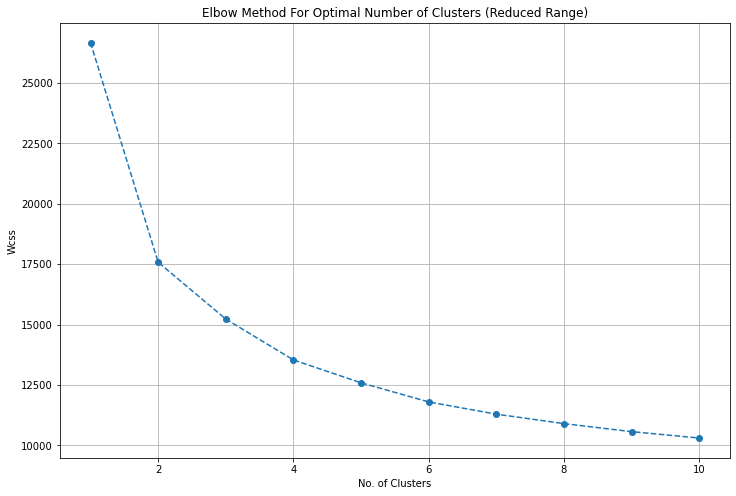

In [199]:
plt.figure(figsize=(12,8))
plt.plot(range(1,11),wcss_reduced,marker='o',linestyle='--')
plt.xlabel('No. of Clusters')
plt.ylabel('Wcss')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.grid()
plt.show()

In [201]:
# Define the weights for each
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}
# Calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)


In [208]:
df['luxury_score'] = luxury_score

In [209]:
# cols to drop -> nearbyLocations,furnishDetails, features,features_list, additionalRoom
df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],inplace=True)
df.sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2805,flat,signature global the millennia,sector 37d,0.65,10906.0,596.0,Super Built up area 650(60.39 sq.m.)Carpet area: 596 sq.ft. (55.37 sq.m.),2,2,3,0.0,NaN,New Property,650.0,NaN,596.00,0,0,0,0,0,2,40
1888,flat,smart world gems,sector 89,1.00,9007.0,1110.0,Carpet area: 1110 (103.12 sq.m.),2,2,3,3.0,NaN,New Property,NaN,NaN,1110.00,1,0,0,0,1,2,99
193,flat,signature global solera,sector 107,0.40,6644.0,602.0,Super Built up area 602(55.93 sq.m.)Carpet area: 548 sq.ft. (50.91 sq.m.),2,2,1,7.0,NaN,Relatively New,602.0,NaN,548.00,0,0,0,0,0,0,55
183,house,independent,sector 26,6.75,27778.0,2430.0,Plot area 270(225.75 sq.m.),3,3,3,2.0,North-East,Moderately Old,NaN,2430.0,NaN,0,0,0,0,0,2,27
2381,flat,mvn athens,sohna road,0.26,5397.0,482.0,Carpet area: 481.73 (44.75 sq.m.),2,2,1,5.0,NaN,Relatively New,NaN,NaN,481.73,0,0,0,0,0,2,95


In [210]:
df.shape

(3803, 23)

In [ ]:
df.to_csv('gurgaon_properties_cleaned_v2.csv',index=False)